# Análisis exploratorio usando Pandas y Matplotlib

**Autor:** Roberto Muñoz <br />
**E-mail:** <rmunoz@metricarts.com> <br />
**Github:** <https://github.com/rpmunoz> <br />


Para visualizar datos en Python debemos cargar algunas librerías. Las librerías más empleadas para analizar y visualizar datos son las siguientes,

- **numpy**: Numpy es una librería de Python usada para cálculo numérico y científico. Abreviatura de Numerical Python.


- **pandas**: Pandas es una librería de Python usada para el análisis de datos. Ofrece estructuras de datos flexibles y permite trabajar con ellos de forma muy eficiente.


- **matplotlib**: Matplotlib es la librería más popular de Python para hacer visualizaciones y gráficos. Matplotlib posee gran flexibilidad para generar diferentes tipos de gráficos.


- **seaborn**: Seaborn es una librería de visualización basada en matplotlib. La idea de Seaborn es que los científicos de datos dispongan de una interfaz para hacer gráficos estadísticos atractivos y explicativos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 7.5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# También es posible limitar el número de registros que imprimirá en pantalla Pandas
pd.set_option('display.max_rows', 30)

## Lectura de datos

Para este tutorial usaremos una base de datos de vuelos áreos publicada por el sitio web [Openflights](https://openflights.org/data.html). La base de datos contiene una tabla de los aeropuertos en el mundo (**`aeropuertos.csv`**), una tabla de las aerolíneas en el mundo (**`aerolineas.csv`**) y una tabla de las rutas de vuelos comerciales (**`rutas.csv`**).

Más información en https://github.com/jpatokal/openflights

In [2]:
aeropuertos_file='data/aeropuertos.csv'
aerolineas_file='data/aerolineas.csv'
rutas_file='data/rutas.csv'

aeropuertos=pd.read_csv(aeropuertos_file)
aerolineas=pd.read_csv(aerolineas_file)
rutas=pd.read_csv(rutas_file)

In [3]:
aeropuertos.head()

,Id,Nombre,Ciudad,Pais,IATA,OACI,Latitud,Longitud,Altitud,Zona_horaria,Horario_verano,Zona_horaria_lugar,Tipo,Fuente
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,1610.0,10.0,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,6.1,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,1642.3,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,72.8,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,44.5,10.0,U,Pacific/Port_Moresby,airport,OurAirports


In [4]:
aerolineas.head()

,Linea_aerea_Id,Linea_aerea,Alias,IATA,OACI,Sigla_identificacion,Pais,Activa
0,-1,Unknown,NaN,-,NaN,NaN,NaN,Y
1,1,Private flight,NaN,-,NaN,NaN,NaN,Y
2,2,135 Airways,NaN,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,NaN,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,NaN,NaN,WYT,NaN,United Kingdom,N


In [5]:
rutas.head()

,Linea_aerea,Linea_aerea_Id,Aeropuerto_origen,Aeropuerto_origen_Id,Aeropuerto_destino,Aeropuerto_destino_Id,Vuelo_operado,Numero_paradas,Modelo_avion,Pais_origen,Pais_destino,Distancia_km
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2,Russia,Russia,1505.879589
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2,Russia,Russia,1039.785086
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2,Russia,Russia,447.883531
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2,Russia,Russia,770.024740
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2,Russia,Russia,1337.791014


In [6]:
rutas[rutas['Pais_origen'] == 'Chile']

,Linea_aerea,Linea_aerea_Id,Aeropuerto_origen,Aeropuerto_origen_Id,Aeropuerto_destino,Aeropuerto_destino_Id,Vuelo_operado,Numero_paradas,Modelo_avion,Pais_origen,Pais_destino,Distancia_km
1910,5P,10650,ANF,2651,IQQ,2649,NaN,0,737,Chile,Chile,324.436626
1911,5P,10650,CCP,2656,SCL,2650,NaN,0,737,Chile,Chile,428.842307
1912,5P,10650,IQQ,2649,SCL,2650,NaN,0,737,Chile,Chile,1430.069156
1913,5P,10650,SCL,2650,ANF,2651,NaN,0,737,Chile,Chile,1106.027336
1931,5Q,18232,SCL,2650,MVD,2816,NaN,0,319,Chile,Uruguay,1365.685310
6364,AA,24,PMC,2665,PUQ,2647,Y,0,320,Chile,Chile,1295.915402
6480,AA,24,SCL,2650,DFW,3670,NaN,0,763,Chile,United States,7861.345235
6481,AA,24,SCL,2650,JFK,3797,Y,0,787,Chile,United States,8232.626487
6482,AA,24,SCL,2650,LIM,2789,Y,0,763,Chile,Peru,2460.347364
6483,AA,24,SCL,2650,MIA,3576,NaN,0,763,Chile,United States,6653.310224


## Visualización de datos

### 1. Histograma de frecuencia absoluta

Uno de los gráficos más usados para la visualización de datos es el **histograma**. Un histograma es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados. Sirven para obtener una primera vista general de la distribución de la muestra de datos respecto a una característica.

Supongamos que nos interesa contar el número de vuelos de acuerdo a la distancia recorrida en kilómetros. Para ello construimos un histograma de la Distancia de los vuelos.

Text(0.5,1,'Histograma - Frecuencia absoluta')

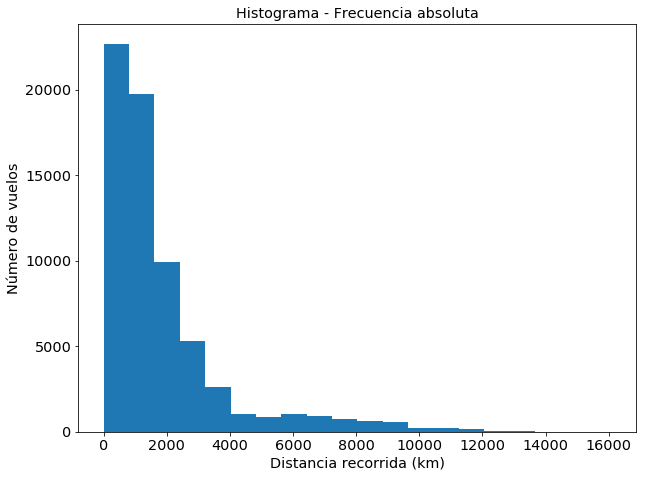

In [7]:
n, bins, patches = plt.hist(rutas['Distancia_km'], bins=20)
plt.xlabel('Distancia recorrida (km)')
plt.ylabel('Número de vuelos')
plt.title('Histograma - Frecuencia absoluta')

Es importante notar que los histogramas se contruyen usando variables cuantitativas, como es el caso de la variable **Distancia recorrida (km)**.

### 2. Histograma de frecuencia relativa

Text(0.5,1,'Histograma - Frecuencia relativa')

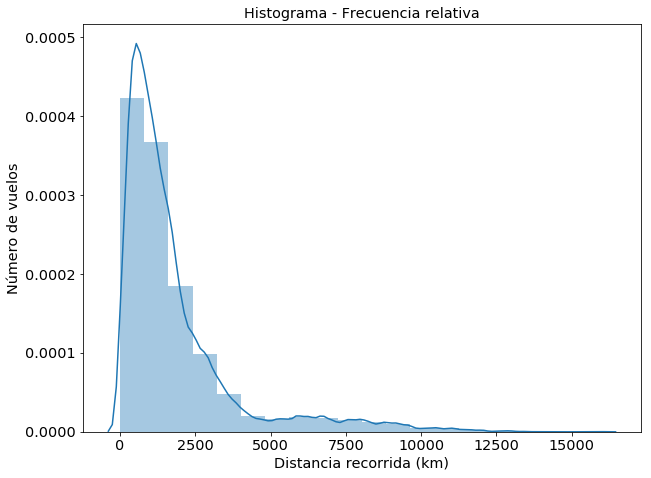

In [8]:
sns.distplot(rutas['Distancia_km'], bins=20)
plt.xlabel('Distancia recorrida (km)')
plt.ylabel('Número de vuelos')
plt.title('Histograma - Frecuencia relativa')

### 3. Gráfico de barras

Otro gráfico ampliamente usado es el **diagrama de barras** o **gráfico de barras**. Es una representación gráfica de un conjunto de datos o valores, y está conformado por barras rectangulares de longitudes proporcionales a los valores representados.

A diferencia de un histograma, el gráfico de barras se construye usando variables categóricas o cualitativas.

Digamos que nos interesa separar los vuelos en cortos, intermedios y largos de acuerdo a la distancia recorrida. Para ello, creamos tres categorías y hacemos un gráfico de barras.

In [9]:
bins = [0, 2000, 10000, 1000000]
group_names = ['Vuelo corto', 'Vuelo intermedio', 'Vuelo largo']
rutas['Tipo_vuelo'] = pd.cut(rutas['Distancia_km'], bins, labels=group_names)

In [10]:
rutas.tail()

,Linea_aerea,Linea_aerea_Id,Aeropuerto_origen,Aeropuerto_origen_Id,Aeropuerto_destino,Aeropuerto_destino_Id,Vuelo_operado,Numero_paradas,Modelo_avion,Pais_origen,Pais_destino,Distancia_km,Tipo_vuelo
66760,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3,Australia,Australia,229.576354,Vuelo corto
66761,ZM,19016,DME,4029,FRU,2912,NaN,0,734,Russia,Kyrgyzstan,2940.971625,Vuelo intermedio
66762,ZM,19016,FRU,2912,DME,4029,NaN,0,734,Kyrgyzstan,Russia,2940.971625,Vuelo intermedio
66763,ZM,19016,FRU,2912,OSS,2913,NaN,0,734,Kyrgyzstan,Kyrgyzstan,306.103069,Vuelo corto
66764,ZM,19016,OSS,2913,FRU,2912,NaN,0,734,Kyrgyzstan,Kyrgyzstan,306.103069,Vuelo corto


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

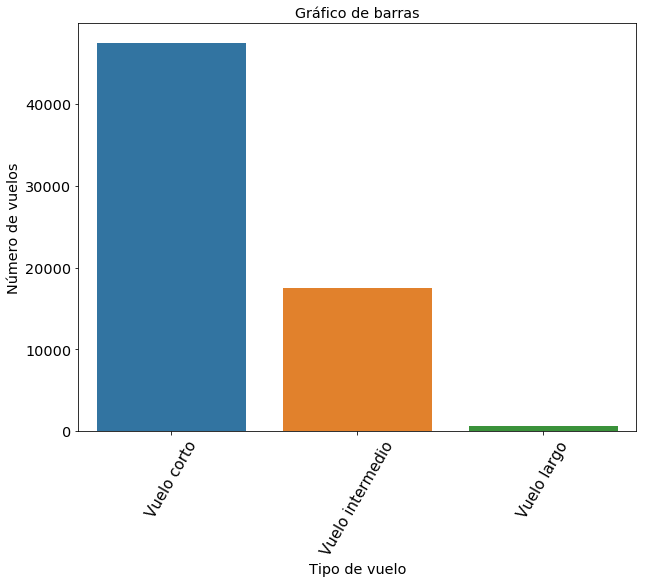

In [11]:
sns.countplot(x="Tipo_vuelo", order=group_names, data=rutas)
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.title('Gráfico de barras')
plt.xticks(size = 15, rotation=60)

Digamos que nos interesa conocer el número de vuelos que parten desde algún país en Sudamérica. La mejor manera de visualizar el número de vuelos por país es usando un gráfico de barras.

In [12]:
paises_sudamerica=['Brazil','Colombia','Argentina','Peru','Venezuela','Chile','Ecuador','Bolivia','Paraguay','Uruguay','Guyana','Suriname','French Guiana']
rutas_sudamerica=rutas[rutas['Pais_origen'].isin(paises_sudamerica)]
rutas_sudamerica_pais=rutas_sudamerica.groupby('Pais_origen')['Linea_aerea'].agg('count').sort_values(ascending=False)

In [13]:
rutas_sudamerica_pais.head()

Pais_origen
Brazil       1387
Colombia      357
Argentina     255
Venezuela     191
Peru          180
Name: Linea_aerea, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

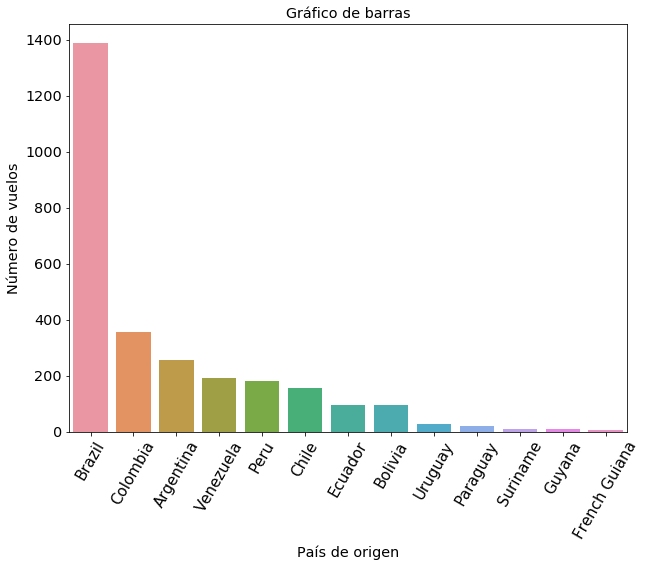

In [14]:
sns.countplot(x="Pais_origen", order=rutas_sudamerica_pais.index.tolist(), data=rutas_sudamerica)
plt.xlabel('País de origen')
plt.ylabel('Número de vuelos')
plt.title('Gráfico de barras')
plt.xticks(size = 15, rotation=60)

### 4. Gráfico de cajas

Otro gráfico usado es el **diagrama de caja** o **gráfico de caja**. Es un gráfico que está basado en cuartiles y mediante el cual se visualiza la distribución de un conjunto de datos. Está compuesto por un rectángulo (caja) y dos brazos (bigotes).

Digamos que nos interesa conocer cómo se distribuyen los vuelos en cada país de Sudamérica. Para ello usamos la variable *País de origen* como variable categórica y la variable *Distancia recorrida* para estudiar su distribución.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

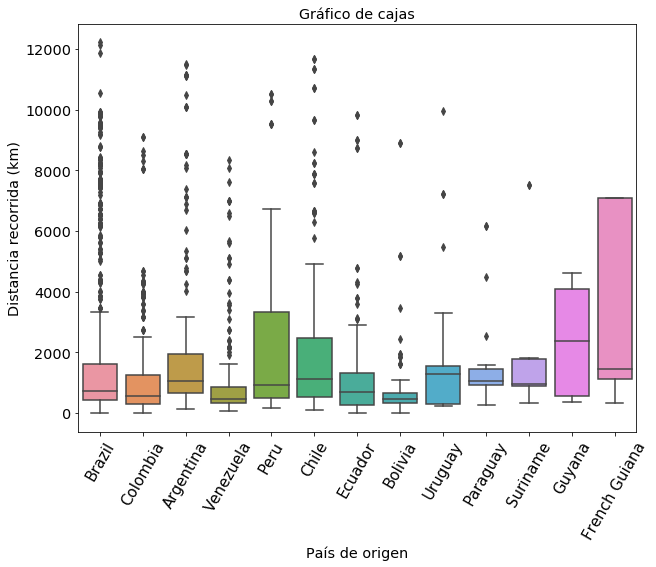

In [15]:
sns.boxplot(x='Pais_origen', y='Distancia_km', order=rutas_sudamerica_pais.index.tolist(), data=rutas_sudamerica)
plt.xlabel('País de origen')
plt.ylabel('Distancia recorrida (km)')
plt.title('Gráfico de cajas')
plt.xticks(size = 15, rotation=60)

### 4. Gráfico de puntos

Otro gráfico usado es el **diagrama de dispersión** o **gráfico de puntos**. Es un gráfico que utiliza las coordenadas cartesianas para mostrar los valores de dos variables de un conjunto de datos.

Cabe notar que un gráfico de puntos se construye usando variables cuantitativas.

Supongamos que nos interesa saber si los vuelos que parten desde el hemisferio Norte son más largos que los vuelos que parten desde el hemisferio Sur. Para ello usamos la variable *Latitud País de origen* como variable dependiente y la variable *Distancia recorrida* como variable independiente.

In [16]:
rutas_coordenadas=rutas.merge(aeropuertos[['Id','Latitud','Longitud']], how='inner', left_on='Aeropuerto_origen_Id', right_on='Id')
rutas_coordenadas=rutas_coordenadas.sample(10000)

In [17]:
rutas_coordenadas.head()

,Linea_aerea,Linea_aerea_Id,Aeropuerto_origen,Aeropuerto_origen_Id,Aeropuerto_destino,Aeropuerto_destino_Id,Vuelo_operado,Numero_paradas,Modelo_avion,Pais_origen,Pais_destino,Distancia_km,Tipo_vuelo,Id,Latitud,Longitud
57257,AH,794,BSK,235,ALG,210,NaN,0,ATR 738,Algeria,Algeria,310.215458,Vuelo corto,235,34.793301,5.738230
39093,NH,324,HND,2359,DPS,3940,NaN,0,332,Japan,Indonesia,5557.598958,Vuelo intermedio,2359,35.552299,139.779999
2473,TO,8745,TFS,1056,LGW,502,NaN,0,75W 73H,Spain,United Kingdom,2910.597837,Vuelo intermedio,1056,28.044500,-16.572500
40617,SZ,10122,LBD,6147,KJA,4374,NaN,0,737,Tajikistan,Russia,2426.499910,Vuelo intermedio,6147,40.215401,69.694702
9822,HU,2660,TXL,351,NUE,347,NaN,0,DH4,Germany,Germany,373.523882,Vuelo corto,351,52.559700,13.287700


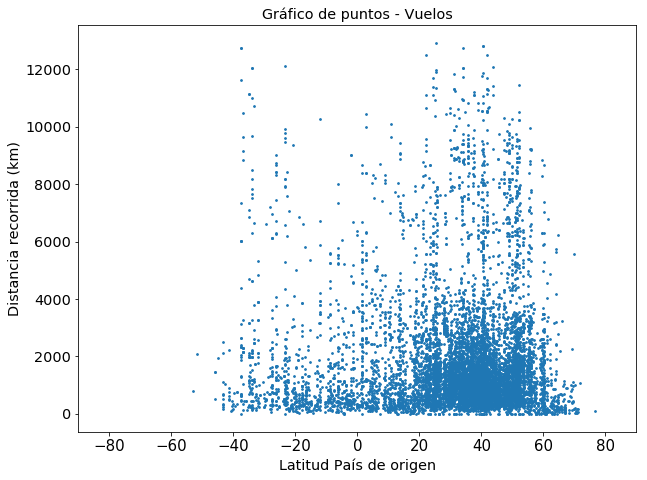

In [18]:
rutas_coordenadas.plot.scatter(x='Latitud', y='Distancia_km', s=3);
plt.xlim(-90,90)
plt.xlabel('Latitud País de origen')
plt.ylabel('Distancia recorrida (km)')
plt.title('Gráfico de puntos - Vuelos')
plt.xticks(size = 15, rotation=0);

Digamos que nos interesa saber como están distribuidos los aeropuertos en el mundo. Para ello usamos las variables `Longitud` y `Latitud` de la tabla aeropuertos.

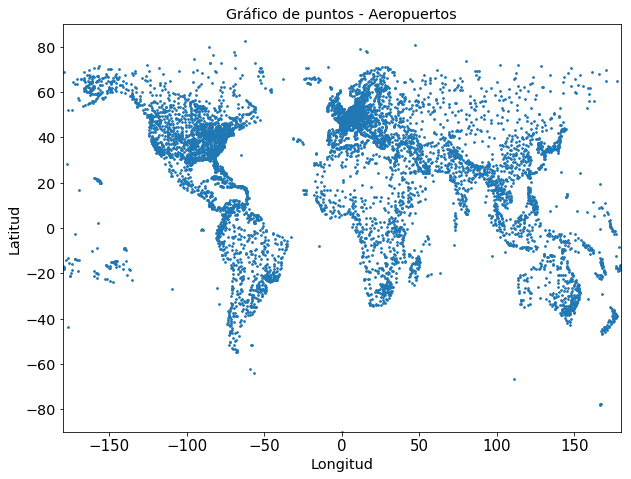

In [19]:
aeropuertos.plot.scatter(x='Longitud', y='Latitud', s=3);
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Gráfico de puntos - Aeropuertos')
plt.xticks(size = 15, rotation=0);

## Gracias por su atención!

Recuerden visitar el repositorio <https://github.com/MetricLearning/intensivo_python> para mantenerse al tanto de actualizaciones y próximos cursos de Python.

Para conocer la oferta de cursos ofrecidos por MetricArts visiten el sitio web https://welcu.com/metric-learning